In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')
# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap
# Import custom project code
import sys
sys.path.append('/home/b1044271/Columbia/bratios')

# Import the Base object used in LISC
from lisc.objects.base import Base

import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/ERPscanr-main/code/")

from plts import plot_year_comparison

In [9]:
# Initialize counts object
counts = Counts()
# Initialize a base object
base = Base()
# Settings for literature collection
db = 'pubmed'
# Notebook settings
SAVE_FIG = False    # Whether to save out figures
SAVE_DATA = False   # Whether to save out collected literature data
RUN_COL = False     # Whether to re-run the data collection. 
                    #   If False, tries to load previously saved data
    
# Set terms list
#   Note: each set of terms within a list is a defined as a set of synonyms
br_terms = [['motor adaptation','motor adaptive', 'Visuomotor adaptation'],
            ['motor learning'],
           ]

# Set list of association terms of interest
#assoc_terms = [
           # [''],
           #   ]

# find only brain related papers
inclusions = [['brain'], ['brain']]

# Check that the search terms and inclusions line up
assert len(br_terms) == len(inclusions)


In [10]:
# Add band-ratio terms to the LISC object
counts.add_terms(br_terms)
# Add the inclusion and exclusions
counts.add_terms(inclusions, term_type='inclusions')
# Add association terms to the LISC object
counts.add_terms(assoc_terms, dim='B')
# Check terms
counts.terms['A'].check_terms()
counts.terms['B'].check_terms()


# Collect co-occurrence data
counts.run_collection(verbose=True)

List of terms used: 

motor adaptation  : motor adaptation, motor adaptive, Visuomotor adaptation
motor learning    : motor learning
List of terms used: 



ValueError: '=' alignment not allowed in string format specifier

The number of documents found for each search term is:
  'motor adaptation'   -    25
  'motor learning'     -   179


([<matplotlib.axis.XTick at 0x7fd240c954c0>,
 [Text(1, 0, 'MA'), Text(2, 0, 'ML')])

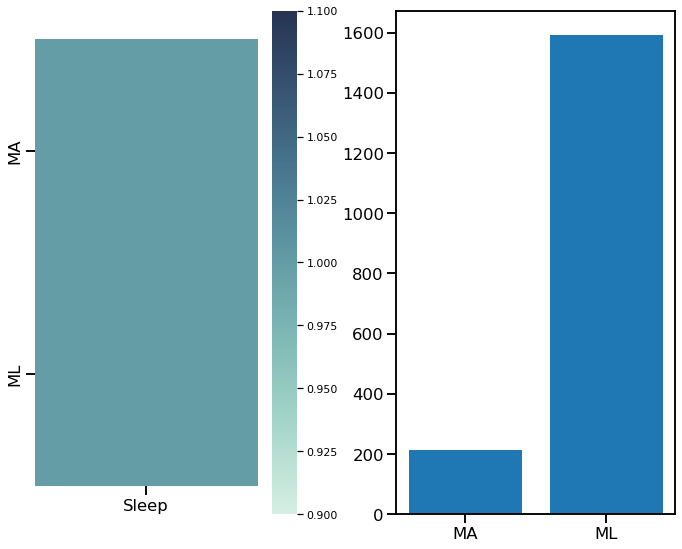

In [5]:
# Check how many papers were found for each ratio search term
counts.check_counts()
# Since different ratios have different numbers of results, we will normalize the association results
counts.compute_score('normalize', dim='A')
# Set adapted versions of the labels to use as plot labels
ratio_labels = ['MA','ML']
assoc_labels = ['Sleep']

# Plot the associations of band ratio measures in the literature
fig, (ax,ax2) = plt.subplots(1,2, figsize=(10, 8))
plot_matrix(counts.score, assoc_labels, ratio_labels, cmap='blue', square=True, ax=ax)
ax2.bar([1,2],[212, 1593], width=0.8, bottom=None, align='center', data=None)
plt.xticks([1,2], ['MA', 'ML'])


List of terms used: 

motor adaptation  : motor adaptation, motor adaptive, Visuomotor adaptation
motor learning    : motor learning
List of terms used: 

sleep  : sleep, Sleep stage, polysomnography, nap
Running counts for:  motor adaptation
Running counts for:  motor learning
The number of documents found for each search term is:
  'motor adaptation'   -    25
  'motor learning'     -   179


([<matplotlib.axis.XTick at 0x7fd240a9d2b0>,
 [Text(1, 0, 'MA'), Text(2, 0, 'ML')])

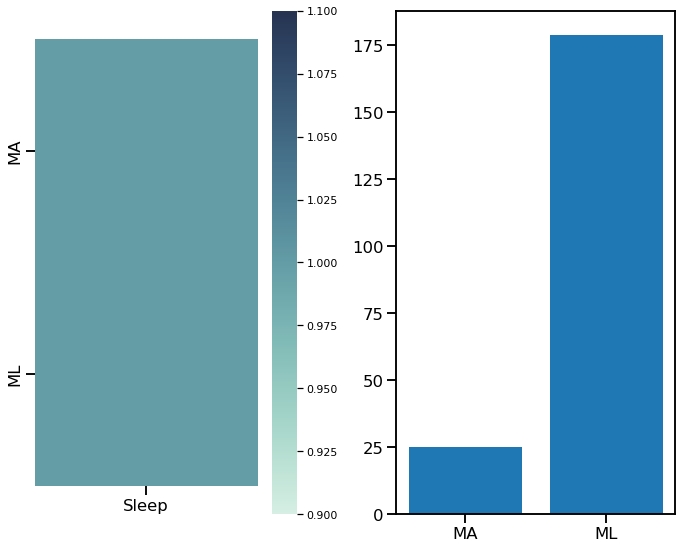

In [6]:
# Initialize counts object
counts = Counts()
# Initialize a base object
base = Base()
# Settings for literature collection
db = 'pubmed'
# Notebook settings
SAVE_FIG = False    # Whether to save out figures
SAVE_DATA = False   # Whether to save out collected literature data
RUN_COL = False     # Whether to re-run the data collection. 
                    #   If False, tries to load previously saved data
    
# Set terms list
#   Note: each set of terms within a list is a defined as a set of synonyms
br_terms = [['motor adaptation','motor adaptive', 'Visuomotor adaptation'],
            ['motor learning'],
           ]

# Set list of association terms of interest
assoc_terms = [
            ['sleep','Sleep stage', 'polysomnography', 'nap'],
              ]

# find only brain related papers
inclusions = [['sleep'], ['sleep']]

# Check that the search terms and inclusions line up
assert len(br_terms) == len(inclusions)

# Add band-ratio terms to the LISC object
counts.add_terms(br_terms)
# Add the inclusion and exclusions
counts.add_terms(inclusions, term_type='inclusions')
# Add association terms to the LISC object
counts.add_terms(assoc_terms, dim='B')
# Check terms
counts.terms['A'].check_terms()
counts.terms['B'].check_terms()


# Collect co-occurrence data
counts.run_collection(verbose=True)

# Check how many papers were found for each ratio search term
counts.check_counts()
# Since different ratios have different numbers of results, we will normalize the association results
counts.compute_score('normalize', dim='A')
# Set adapted versions of the labels to use as plot labels
ratio_labels = ['MA','ML']
assoc_labels = ['Sleep']

# Plot the associations of band ratio measures in the literature
fig, (ax,ax2) = plt.subplots(1,2, figsize=(10, 8))
plot_matrix(counts.score, assoc_labels, ratio_labels, cmap='blue', square=True, ax=ax)
ax2.bar([1,2],[25, 179], width=0.8, bottom=None, align='center', data=None)
plt.xticks([1,2], ['MA', 'ML'])


In [ ]:
# time series
# Define the range of the decades to collect information on
start_decade, end_decade = 1990, 2022
decades = list(range(start_decade, end_decade, 10))
    
# Define a list of modalities of interest, with synonyms
modality_terms = [['motor adaptation','motor adaptive', 'VIsuomotor adaptation'],
            ['motor learning'],
           ]
# Define a list of labels to use for the method terms
modality_labels = [lst[0] for lst in modality_terms]

In [ ]:
# Notebook settings
SAVE_FIG = False
SAVE_DATA = False
RUN_COLLECTION = True
# Collect information across each decade of interest
if RUN_COLLECTION:
    
    decade_counts = []
    for start_year in decades:

        count, _ = collect_counts(modality_terms, inclusions_a=inclusions
                                  collect_coocs=False,
                                  mindate=str(start_year) + '/01/01',
                                  maxdate=str(start_year+9) + '/12/31')
        decade_counts.append(count)

    # Convert the collected data into an array, of [n_terms, decade_counts]
    decade_counts = np.array(decade_counts).T
    
    if SAVE_DATA:
        # Save out the collected data for the method counts by decade
        for ind, label in enumerate(modality_labels):
            for decade, count in zip(decades, decade_counts):
                with open(data_dir / 'decades' / (label + '.csv'), 'w') as save_file:
                    for decade, count in zip(decades, decade_counts[ind, :]):
                        save_file.write(str(decade) + ',' + str(count) +'\n')
                        
else:
    decade_counts = []
    for m_term in modality_labels:
        with open(data_dir / 'decades'/ (m_term + '.csv'), 'r') as f_obj:
            count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
        decade_counts.append(count)
    decade_counts = np.array(decade_counts)

In [12]:
counts.score

array([[0.01886792],
       [0.03013183]])

In [17]:
counts.score[1]

array([0.03013183])

In [18]:
[1]

[1]

In [19]:
np.concatenate(counts.score)

array([0.01886792, 0.03013183])

In [21]:
counts.score.flatten()

array([0.01886792, 0.03013183])

In [27]:
counts

In [28]:
counts.objects

AttributeError: 'Counts' object has no attribute 'objects'

In [32]:
compute_score?

Object `compute_score` not found.
